# Chapter 9: Models with Natural Logarithms

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch09_visual_summary.jpg" alt="Chapter 09 Visual Summary" width="65%">

This notebook teaches you how to use natural logarithms in regression analysis to measure elasticities, semi-elasticities, and percentage changes—essential tools for empirical economics.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch09_Models_with_Natural_Logarithms.ipynb)

## Chapter Overview

**Why logarithms in economics?**

Economists care about **proportionate changes** more than absolute changes:
- A $10,000 salary increase means different things at $30,000 vs $300,000 income
- A $1 price change matters differently for a $2 item vs a $100 item
- Economic theory often predicts **percentage** responses (e.g., price elasticity of demand)

**Natural logarithms** let us work with proportionate changes easily in regression models.

**What you'll learn:**
- Properties of the natural logarithm function
- How ln(x) approximates proportionate changes
- **Four key model specifications:**
  1. **Linear:** y = β₀ + β₁x (absolute change)
  2. **Log-linear:** ln(y) = β₀ + β₁x (semi-elasticity)
  3. **Log-log:** ln(y) = β₀ + β₁ln(x) (elasticity)
  4. **Linear-log:** y = β₀ + β₁ln(x) (diminishing returns)
- How to interpret coefficients in each model
- Practical applications: earnings-education, exponential growth

**Datasets used:**
- **AED_EARNINGS.DTA**: Annual earnings and education (171 workers)
- **AED_SP500INDEX.DTA**: S&P 500 stock index 1927-2019 (93 years)

**Chapter outline:**
1. Natural Logarithm Function
2. Semi-Elasticities and Elasticities
3. Log-Linear, Log-Log, and Linear-Log Models
4. Example: Earnings and Education (four model comparison)
5. Further Uses: Exponential Growth
6. Exponential Function

**Key insight:** Transforming variables to logarithms changes the **interpretation** of regression coefficients from absolute changes to **percentage changes**.

## 🔧 Setup

Run this cell first to import all required packages and configure the environment.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 9.1 Natural Logarithm Function

The **natural logarithm** ln(x) is the logarithm to base **e** ≈ 2.71828...

**Definition:**
$$\ln(x) = \log_e(x), \quad x > 0$$

**Key properties:**
1. ln(1) = 0
2. ln(e) = 1
3. ln(ab) = ln(a) + ln(b) (product rule)
4. ln(a/b) = ln(a) - ln(b) (quotient rule)
5. ln(aᵇ) = b·ln(a) (power rule)
6. exp(ln(x)) = x (inverse function)

**Most important property for economics:**
$$\Delta \ln(x) \approx \frac{\Delta x}{x} \quad \text{(for small changes)}$$

This means: **Change in ln(x) ≈ proportionate change in x**

Multiplying by 100: **100 × Δln(x) ≈ percentage change in x**

**Example:** If x increases from 40 to 40.4:
- Exact proportionate change: (40.4 - 40)/40 = 0.01 (1%)
- Log approximation: ln(40.4) - ln(40) = 0.00995 ≈ 0.01 ✓

In [ ]:
# Demonstrate logarithm properties
print("="*70)
print("PROPERTIES OF NATURAL LOGARITHM")
print("="*70)

x_values = np.array([0.5, 1, 2, 5, 10, 20, 100])
ln_values = np.log(x_values)

log_table = pd.DataFrame({
    'x': x_values,
    'ln(x)': ln_values,
    'exp(ln(x))': np.exp(ln_values)
})
print(log_table.to_string(index=False))

print("\n" + "="*70)
print("KEY PROPERTIES DEMONSTRATED")
print("="*70)
print(f"1. ln(1) = {np.log(1):.4f}")
print(f"2. ln(e) = {np.log(np.e):.4f}")
print(f"3. ln(2×5) = ln(2) + ln(5):  {np.log(2*5):.4f} = {np.log(2) + np.log(5):.4f} ✓")
print(f"4. ln(10/2) = ln(10) - ln(2): {np.log(10/2):.4f} = {np.log(10) - np.log(2):.4f} ✓")

print("\n" + "="*70)
print("APPROXIMATING PROPORTIONATE CHANGES")
print("="*70)
x0, x1 = 40, 40.4
exact_prop_change = (x1 - x0) / x0
log_approx = np.log(x1) - np.log(x0)
print(f"Change from {x0} to {x1}:")
print(f"  Exact proportionate change:    {exact_prop_change:.6f} ({exact_prop_change*100:.2f}%)")
print(f"  Log approximation Δln(x):      {log_approx:.6f} ({log_approx*100:.2f}%)")
print(f"  Difference:                    {abs(exact_prop_change - log_approx):.6f}")
print(f"\n  → The approximation is excellent for small changes!")

PROPERTIES OF NATURAL LOGARITHM
    x     ln(x)  exp(ln(x))
  0.5 -0.693147         0.5
  1.0  0.000000         1.0
  2.0  0.693147         2.0
  5.0  1.609438         5.0
 10.0  2.302585        10.0
 20.0  2.995732        20.0
100.0  4.605170       100.0

KEY PROPERTIES DEMONSTRATED
1. ln(1) = 0.0000
2. ln(e) = 1.0000
3. ln(2×5) = ln(2) + ln(5):  2.3026 = 2.3026 ✓
4. ln(10/2) = ln(10) - ln(2): 1.6094 = 1.6094 ✓

APPROXIMATING PROPORTIONATE CHANGES
Change from 40 to 40.4:
  Exact proportionate change:    0.010000 (1.00%)
  Log approximation Δln(x):      0.009950 (1.00%)
  Difference:                    0.000050

  → The approximation is excellent for small changes!


## 9.2 Semi-Elasticities and Elasticities

Two key concepts in economics:

### Semi-Elasticity
**Definition:** Proportionate change in y for a **unit change** in x
$$\text{Semi-elasticity}_{yx} = \frac{\Delta y / y}{\Delta x}$$

Multiplied by 100: **percentage change in y when x increases by 1 unit**

**Example:** Semi-elasticity of earnings with respect to education = 0.08
- One more year of schooling → 8% increase in earnings

### Elasticity
**Definition:** Proportionate change in y for a **proportionate change** in x
$$\text{Elasticity}_{yx} = \frac{\Delta y / y}{\Delta x / x}$$

**Example:** Price elasticity of demand = -2
- 1% increase in price → 2% decrease in demand

### Approximations Using Logarithms
Since Δy/y ≈ Δln(y) and Δx/x ≈ Δln(x):

$$\text{Semi-elasticity} \approx \frac{\Delta \ln(y)}{\Delta x}$$

$$\text{Elasticity} \approx \frac{\Delta \ln(y)}{\Delta \ln(x)}$$

**This is why we use logarithms in regression!** The slope coefficient directly estimates the semi-elasticity or elasticity.

In [ ]:
print("="*70)
print("MODEL INTERPRETATIONS")
print("="*70)
print("\n1. LINEAR MODEL: y = β₀ + β₁x")
print("   Interpretation: Δy = β₁Δx")
print("   Example: β₁ = 5000 means $5,000 increase in y when x increases by 1")

print("\n2. LOG-LINEAR MODEL: ln(y) = β₀ + β₁x")
print("   Interpretation: %Δy ≈ 100β₁Δx (semi-elasticity)")
print("   Example: β₁ = 0.08 means 8% increase in y when x increases by 1")

print("\n3. LOG-LOG MODEL: ln(y) = β₀ + β₁ln(x)")
print("   Interpretation: %Δy ≈ β₁%Δx (elasticity)")
print("   Example: β₁ = 1.5 means 1.5% increase in y when x increases by 1%")

print("\n4. LINEAR-LOG MODEL: y = β₀ + β₁ln(x)")
print("   Interpretation: Δy ≈ (β₁/100)%Δx")
print("   Example: β₁ = 500 means $5 increase in y when x increases by 1%")

print("\n" + "="*70)
print("KEY TAKEAWAY")
print("="*70)
print("The choice of model specification determines the interpretation:")
print("  - Which model to use depends on economic theory and data properties")
print("  - Log transformations are especially useful for:")
print("    • Right-skewed variables (earnings, prices, firm size)")
print("    • Multiplicative relationships")
print("    • Proportionate/percentage effects")

MODEL INTERPRETATIONS

1. LINEAR MODEL: y = β₀ + β₁x
   Interpretation: Δy = β₁Δx
   Example: β₁ = 5000 means $5,000 increase in y when x increases by 1

2. LOG-LINEAR MODEL: ln(y) = β₀ + β₁x
   Interpretation: %Δy ≈ 100β₁Δx (semi-elasticity)
   Example: β₁ = 0.08 means 8% increase in y when x increases by 1

3. LOG-LOG MODEL: ln(y) = β₀ + β₁ln(x)
   Interpretation: %Δy ≈ β₁%Δx (elasticity)
   Example: β₁ = 1.5 means 1.5% increase in y when x increases by 1%

4. LINEAR-LOG MODEL: y = β₀ + β₁ln(x)
   Interpretation: Δy ≈ (β₁/100)%Δx
   Example: β₁ = 500 means $5 increase in y when x increases by 1%

KEY TAKEAWAY
The choice of model specification determines the interpretation:
  - Which model to use depends on economic theory and data properties
  - Log transformations are especially useful for:
    • Right-skewed variables (earnings, prices, firm size)
    • Multiplicative relationships
    • Proportionate/percentage effects


## 9.4 Example: Earnings and Education

**Research Question:** How do earnings vary with years of education?

We'll estimate **four different models** and compare their interpretations:

1. **Linear:** earnings = β₀ + β₁(education)
2. **Log-linear:** ln(earnings) = β₀ + β₁(education)
3. **Log-log:** ln(earnings) = β₀ + β₁ln(education)
4. **Linear-log:** earnings = β₀ + β₁ln(education)

**Dataset:** 171 full-time workers aged 30 in 2010
- earnings: Annual earnings in dollars
- education: Years of completed schooling

Each model answers a slightly different question and has different economic interpretation.

In [ ]:
# Load and explore the data
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')

print("="*70)
print("DATA SUMMARY: EARNINGS AND EDUCATION")
print("="*70)
print(data_earnings[['earnings', 'education']].describe())

print("\nFirst 5 observations:")
print(data_earnings[['earnings', 'education']].head())

DATA SUMMARY: EARNINGS AND EDUCATION
            earnings   education
count     171.000000  171.000000
mean    41412.690058   14.432749
std     25527.053396    2.735364
min      1050.000000    3.000000
25%     25000.000000   12.000000
50%     36000.000000   14.000000
75%     49000.000000   16.000000
max    172000.000000   20.000000

First 5 observations:
   earnings  education
0     25000         14
1     40000         12
2     25000         13
3     38000         13
4     28800         12


In [ ]:
# Create log-transformed variables
data_earnings['lnearn'] = np.log(data_earnings['earnings'])
data_earnings['lneduc'] = np.log(data_earnings['education'])

print("="*70)
print("VARIABLES (ORIGINAL AND LOG-TRANSFORMED)")
print("="*70)
table_vars = ['earnings', 'lnearn', 'education', 'lneduc']
print(data_earnings[table_vars].describe())

print("\nNotice:")
print("  - Log(earnings) has much less variability (std = 0.62 vs 25,527)")
print("  - Log transformation reduces right skewness in earnings")

VARIABLES (ORIGINAL AND LOG-TRANSFORMED)
            earnings      lnearn   education      lneduc
count     171.000000  171.000000  171.000000  171.000000
mean    41412.690058   10.457638   14.432749    2.648438
std     25527.053396    0.622062    2.735364    0.225220
min      1050.000000    6.956545    3.000000    1.098633
25%     25000.000000   10.126631   12.000000    2.484375
50%     36000.000000   10.491274   14.000000    2.638672
75%     49000.000000   10.799367   16.000000    2.773438
max    172000.000000   12.055250   20.000000    2.996094

Notice:
  - Log(earnings) has much less variability (std = 0.62 vs 25,527)
  - Log transformation reduces right skewness in earnings


## Model 1: Linear Model

**Specification:** earnings = β₀ + β₁(education) + ε

**Interpretation:** β₁ = change in earnings (in dollars) for one additional year of education

In [ ]:
# Model 1: Linear
print("="*70)
print("MODEL 1: LINEAR - earnings = β₀ + β₁(education)")
print("="*70)

model_linear = ols('earnings ~ education', data=data_earnings).fit()
print(model_linear.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on education: ${model_linear.params['education']:,.2f}")
print(f"\nEconomic meaning:")
print(f"  Each additional year of education is associated with a")
print(f"  ${model_linear.params['education']:,.2f} increase in annual earnings.")
print(f"\nR² = {model_linear.rsquared:.3f}")
print(f"  → Education explains {model_linear.rsquared*100:.1f}% of variation in earnings.")

MODEL 1: LINEAR - earnings = β₀ + β₁(education)
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     68.86
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           3.22e-14
Time:                        00:01:47   Log-Likelihood:                -1948.1
No. Observations:                 171   AIC:                             3900.
Df Residuals:                     169   BIC:                             3907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

## Model 2: Log-Linear Model

**Specification:** ln(earnings) = β₀ + β₁(education) + ε

**Interpretation:** β₁ = **semi-elasticity** = proportionate change in earnings for one more year of education

**Practical interpretation:** 100β₁ = **percentage change** in earnings for one more year of education

This is the **most common** specification for earnings equations!

In [ ]:
# Model 2: Log-linear
print("="*70)
print("MODEL 2: LOG-LINEAR - ln(earnings) = β₀ + β₁(education)")
print("="*70)

model_loglin = ols('lnearn ~ education', data=data_earnings).fit()
print(model_loglin.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on education: {model_loglin.params['education']:.4f}")
print(f"\nEconomic meaning:")
print(f"  Each additional year of education is associated with a")
print(f"  {100*model_loglin.params['education']:.2f}% increase in earnings.")
print(f"\nWhy this is better than Model 1:")
print(f"  - Percentage interpretation is more meaningful (scales automatically)")
print(f"  - 13.1% increase applies whether you earn $30k or $100k")
print(f"  - Better fit (R² = {model_loglin.rsquared:.3f} vs {model_linear.rsquared:.3f})")

MODEL 2: LOG-LINEAR - ln(earnings) = β₀ + β₁(education)
                            OLS Regression Results                            
Dep. Variable:                 lnearn   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     84.74
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           1.28e-16
Time:                        00:01:47   Log-Likelihood:                -126.21
No. Observations:                 171   AIC:                             256.4
Df Residuals:                     169   BIC:                             262.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Model 3: Log-Log Model

**Specification:** ln(earnings) = β₀ + β₁ln(education) + ε

**Interpretation:** β₁ = **elasticity** = percentage change in earnings for a 1% change in education

**Note:** A "1% increase in education" is a bit artificial (what does 0.14 more years mean?), but this model captures diminishing returns to education.

In [ ]:
# Model 3: Log-log
print("="*70)
print("MODEL 3: LOG-LOG - ln(earnings) = β₀ + β₁ln(education)")
print("="*70)

model_loglog = ols('lnearn ~ lneduc', data=data_earnings).fit()
print(model_loglog.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on ln(education): {model_loglog.params['lneduc']:.4f}")
print(f"\nEconomic meaning:")
print(f"  A 1% increase in education is associated with a")
print(f"  {model_loglog.params['lneduc']:.3f}% increase in earnings (elasticity).")
print(f"\nAlternative interpretation:")
print(f"  If education increases from 14 to 14.14 years (1% increase),")
print(f"  earnings increase by approximately {model_loglog.params['lneduc']:.2f}%.")

MODEL 3: LOG-LOG - ln(earnings) = β₀ + β₁ln(education)
                            OLS Regression Results                            
Dep. Variable:                 lnearn   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     67.78
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           4.76e-14
Time:                        00:01:47   Log-Likelihood:                -132.13
No. Observations:                 171   AIC:                             268.3
Df Residuals:                     169   BIC:                             274.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## Model 4: Linear-Log Model

**Specification:** earnings = β₀ + β₁ln(education) + ε

**Interpretation:** β₁/100 = dollar change in earnings for a 1% increase in education

This model is less common but captures **diminishing returns** (additional years of education have decreasing marginal effects).

In [ ]:
# Model 4: Linear-log
print("="*70)
print("MODEL 4: LINEAR-LOG - earnings = β₀ + β₁ln(education)")
print("="*70)

model_linlog = ols('earnings ~ lneduc', data=data_earnings).fit()
print(model_linlog.summary())

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Coefficient on ln(education): {model_linlog.params['lneduc']:,.2f}")
print(f"\nEconomic meaning:")
print(f"  A 1% increase in education is associated with a")
print(f"  ${model_linlog.params['lneduc']/100:,.2f} increase in annual earnings.")
print(f"\nNote: This model has the lowest R² = {model_linlog.rsquared:.3f}")

MODEL 4: LINEAR-LOG - earnings = β₀ + β₁ln(education)
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     50.69
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.96e-11
Time:                        00:01:47   Log-Likelihood:                -1954.9
No. Observations:                 171   AIC:                             3914.
Df Residuals:                     169   BIC:                             3920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Comparison of All Four Models

In [ ]:
# Create comparison table
print("="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Linear', 'Log-linear', 'Log-log', 'Linear-log'],
    'Specification': ['y ~ x', 'ln(y) ~ x', 'ln(y) ~ ln(x)', 'y ~ ln(x)'],
    'Slope Coefficient': [
        f"{model_linear.params[1]:,.2f}",
        f"{model_loglin.params[1]:.4f}",
        f"{model_loglog.params[1]:.4f}",
        f"{model_linlog.params[1]:,.2f}"
    ],
    'Interpretation': [
        f"${model_linear.params[1]:,.0f} per year",
        f"{100*model_loglin.params[1]:.1f}% per year",
        f"{model_loglog.params[1]:.2f}% per 1% change",
        f"${model_linlog.params[1]/100:,.0f} per 1% change"
    ],
    'R²': [
        f"{model_linear.rsquared:.3f}",
        f"{model_loglin.rsquared:.3f}",
        f"{model_loglog.rsquared:.3f}",
        f"{model_linlog.rsquared:.3f}"
    ]
})

print(comparison_df.to_string(index=False))

print("\n" + "="*70)
print("WHICH MODEL IS BEST?")
print("="*70)
print("For this data:")
print(f"  - Best fit (highest R²): Log-linear (R² = {model_loglin.rsquared:.3f})")
print(f"  - Most interpretable: Log-linear (13.1% return per year of education)")
print(f"  - Most common in labor economics: Log-linear")
print("\nGeneral guidance:")
print("  - Use log-linear when dependent variable is right-skewed")
print("  - Use log-log when both variables are right-skewed")
print("  - Compare models using R², economic interpretation, and theory")

MODEL COMPARISON SUMMARY
     Model Specification Slope Coefficient      Interpretation    R²
    Linear         y ~ x          5,021.12     $5,021 per year 0.289
Log-linear     ln(y) ~ x            0.1314      13.1% per year 0.334
   Log-log ln(y) ~ ln(x)            1.4775 1.48% per 1% change 0.286
Linear-log     y ~ ln(x)         54,433.42  $544 per 1% change 0.231

WHICH MODEL IS BEST?
For this data:
  - Best fit (highest R²): Log-linear (R² = 0.334)
  - Most interpretable: Log-linear (13.1% return per year of education)
  - Most common in labor economics: Log-linear

General guidance:
  - Use log-linear when dependent variable is right-skewed
  - Use log-log when both variables are right-skewed
  - Compare models using R², economic interpretation, and theory


/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_94143/1404078335.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{model_linear.params[1]:,.2f}",
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_94143/1404078335.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{model_loglin.params[1]:.4f}",
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_94143/1404078335.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

## Visualizing All Four Models

/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_94143/1405591350.py:54: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_94143/1405591350.py:54: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


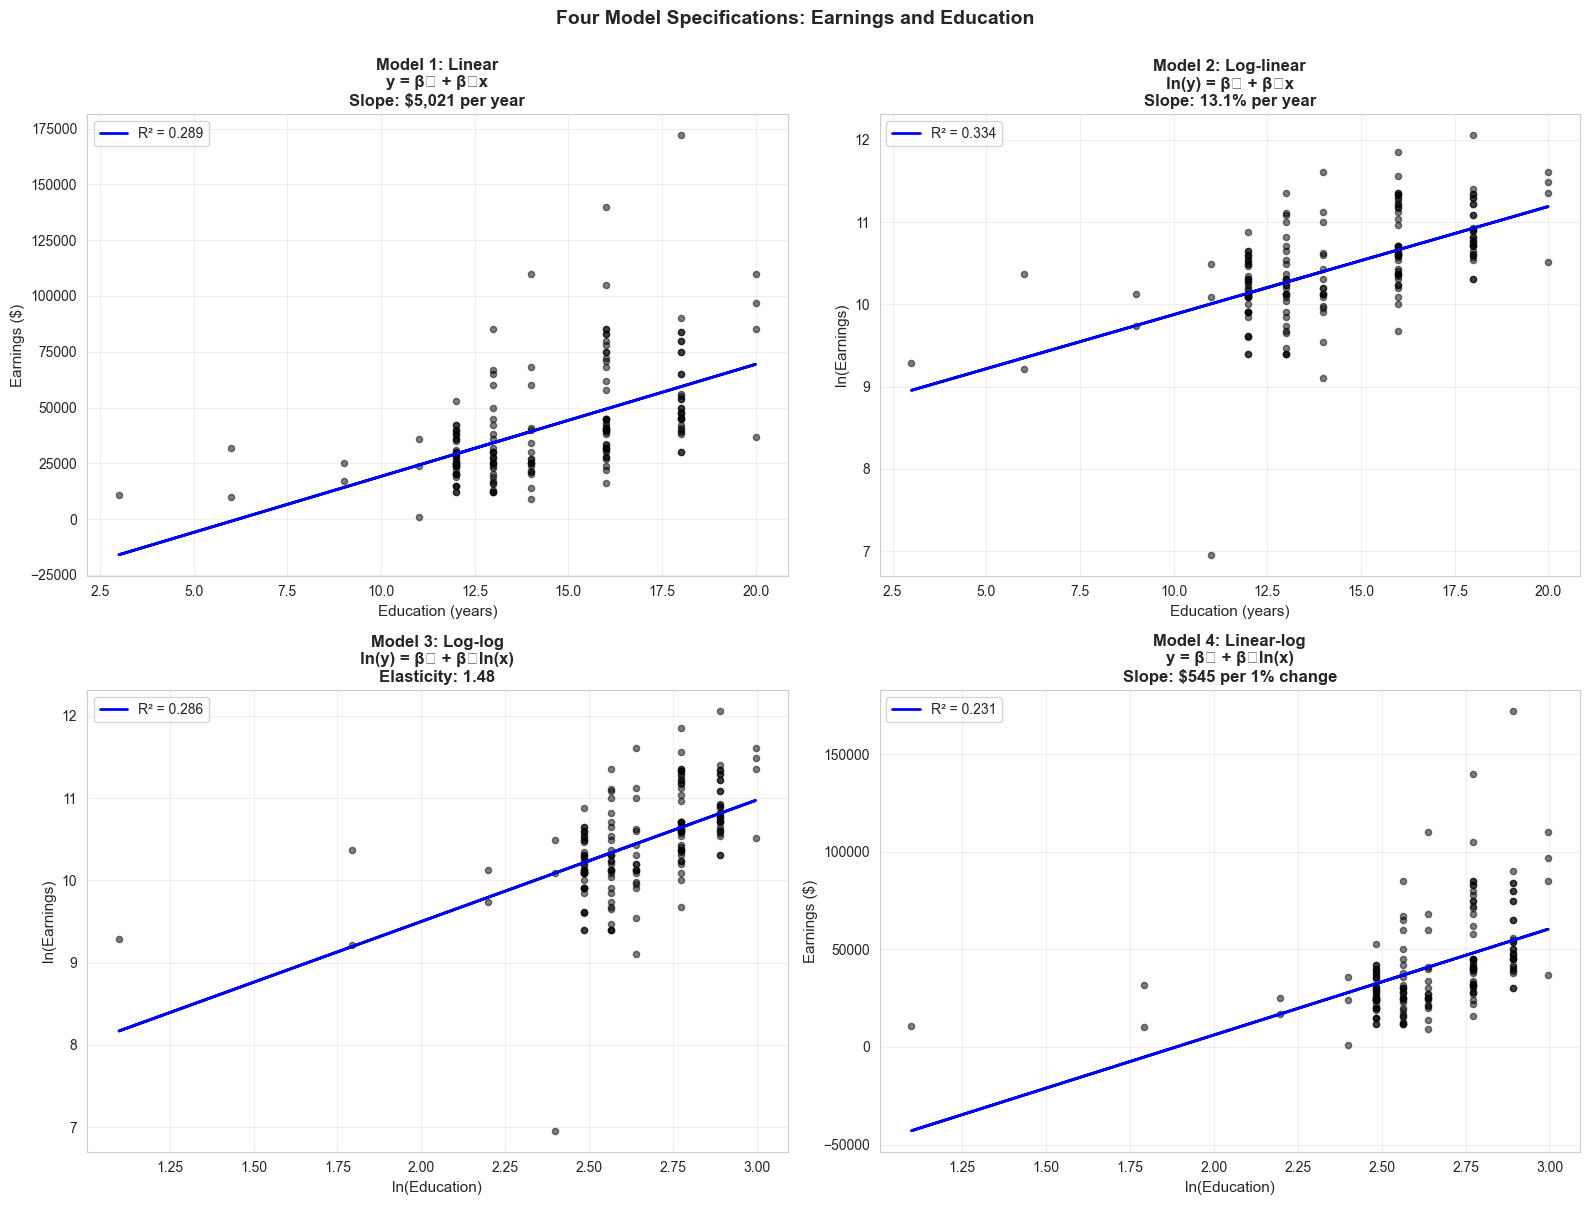


📊 Visual Insights:
   - Model 1 (linear): Straight line fit, but residuals may be heteroskedastic
   - Model 2 (log-linear): Best fit, captures curvature in original data
   - Model 3 (log-log): Both axes logged, captures elasticity
   - Model 4 (linear-log): Captures diminishing returns to education


In [ ]:
# Create 2x2 comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Model 1: Linear
axes[0, 0].scatter(data_earnings['education'], data_earnings['earnings'],
                   alpha=0.5, s=20, color='black')
axes[0, 0].plot(data_earnings['education'], model_linear.fittedvalues,
                color='blue', linewidth=2, label=f'R² = {model_linear.rsquared:.3f}')
axes[0, 0].set_xlabel('Education (years)', fontsize=11)
axes[0, 0].set_ylabel('Earnings ($)', fontsize=11)
axes[0, 0].set_title('Model 1: Linear\ny = β₀ + β₁x\nSlope: $5,021 per year',
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Model 2: Log-linear
axes[0, 1].scatter(data_earnings['education'], data_earnings['lnearn'],
                   alpha=0.5, s=20, color='black')
axes[0, 1].plot(data_earnings['education'], model_loglin.fittedvalues,
                color='blue', linewidth=2, label=f'R² = {model_loglin.rsquared:.3f}')
axes[0, 1].set_xlabel('Education (years)', fontsize=11)
axes[0, 1].set_ylabel('ln(Earnings)', fontsize=11)
axes[0, 1].set_title('Model 2: Log-linear\nln(y) = β₀ + β₁x\nSlope: 13.1% per year',
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Model 3: Log-log
axes[1, 0].scatter(data_earnings['lneduc'], data_earnings['lnearn'],
                   alpha=0.5, s=20, color='black')
axes[1, 0].plot(data_earnings['lneduc'], model_loglog.fittedvalues,
                color='blue', linewidth=2, label=f'R² = {model_loglog.rsquared:.3f}')
axes[1, 0].set_xlabel('ln(Education)', fontsize=11)
axes[1, 0].set_ylabel('ln(Earnings)', fontsize=11)
axes[1, 0].set_title('Model 3: Log-log\nln(y) = β₀ + β₁ln(x)\nElasticity: 1.48',
                     fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Model 4: Linear-log
axes[1, 1].scatter(data_earnings['lneduc'], data_earnings['earnings'],
                   alpha=0.5, s=20, color='black')
axes[1, 1].plot(data_earnings['lneduc'], model_linlog.fittedvalues,
                color='blue', linewidth=2, label=f'R² = {model_linlog.rsquared:.3f}')
axes[1, 1].set_xlabel('ln(Education)', fontsize=11)
axes[1, 1].set_ylabel('Earnings ($)', fontsize=11)
axes[1, 1].set_title('Model 4: Linear-log\ny = β₀ + β₁ln(x)\nSlope: $545 per 1% change',
                     fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Four Model Specifications: Earnings and Education',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 Visual Insights:")
print("   - Model 1 (linear): Straight line fit, but residuals may be heteroskedastic")
print("   - Model 2 (log-linear): Best fit, captures curvature in original data")
print("   - Model 3 (log-log): Both axes logged, captures elasticity")
print("   - Model 4 (linear-log): Captures diminishing returns to education")

## 9.5 Further Uses: Exponential Growth

**Application:** Modeling exponential growth in time series data

Many economic series grow **exponentially** over time:
$$x_t = x_0 \times (1+r)^t$$

Where:
- x₀ = initial value
- r = constant growth rate
- t = time period

**Taking logarithms:**
$$\ln(x_t) = \ln(x_0) + \ln(1+r) \times t \approx \ln(x_0) + r \times t$$

**Key insight:** Exponential growth in levels → **linear growth in logs**!

**Regression model:**
$$\ln(x_t) = \beta_0 + \beta_1 \times t + \varepsilon$$

The slope β₁ directly estimates the growth rate r.

**Example:** S&P 500 stock index 1927-2019

In [ ]:
# Load S&P 500 data
data_sp500 = pd.read_stata(GITHUB_DATA_URL + 'AED_SP500INDEX.DTA')

print("="*70)
print("S&P 500 INDEX DATA (1927-2019)")
print("="*70)
print(data_sp500[['year', 'sp500', 'lnsp500']].describe())

print("\nFirst and last years:")
print(data_sp500[['year', 'sp500', 'lnsp500']].head(3))
print("...")
print(data_sp500[['year', 'sp500', 'lnsp500']].tail(3))

S&P 500 INDEX DATA (1927-2019)
             year        sp500    lnsp500
count    93.00000    93.000000  93.000000
mean   1973.00000   473.664307   4.817428
std      26.99074   710.751831   1.801842
min    1927.00000     6.920000   1.934416
25%    1950.00000    23.770000   3.168424
50%    1973.00000    96.470001   4.569232
75%    1996.00000   740.739990   6.607650
max    2019.00000  3230.780029   8.080479

First and last years:
     year      sp500   lnsp500
0  1927.0  17.660000  2.871302
1  1928.0  24.350000  3.192532
2  1929.0  21.450001  3.065725
...
      year        sp500   lnsp500
90  2017.0  2673.610107  7.891185
91  2018.0  2506.850098  7.826782
92  2019.0  3230.780029  8.080479


In [ ]:
# Estimate exponential growth model
print("="*70)
print("EXPONENTIAL GROWTH MODEL: ln(sp500) = β₀ + β₁(year)")
print("="*70)

model_sp500 = ols('lnsp500 ~ year', data=data_sp500).fit()
print(model_sp500.summary())

growth_rate = model_sp500.params['year']
print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"Estimated annual growth rate: {100*growth_rate:.4f}% per year")
print(f"\nThis means the S&P 500 grew at an average rate of {100*growth_rate:.2f}% per year")
print(f"from 1927 to 2019 (not accounting for inflation or dividends).")
print(f"\nRule of 72: At {100*growth_rate:.2f}% annual growth,")
print(f"the index doubles approximately every {72/(100*growth_rate):.1f} years.")

EXPONENTIAL GROWTH MODEL: ln(sp500) = β₀ + β₁(year)
                            OLS Regression Results                            
Dep. Variable:                lnsp500   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2071.
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.16e-64
Time:                        00:01:48   Log-Likelihood:                -38.919
No. Observations:                  93   AIC:                             81.84
Df Residuals:                      91   BIC:                             86.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## Visualizing Exponential Growth

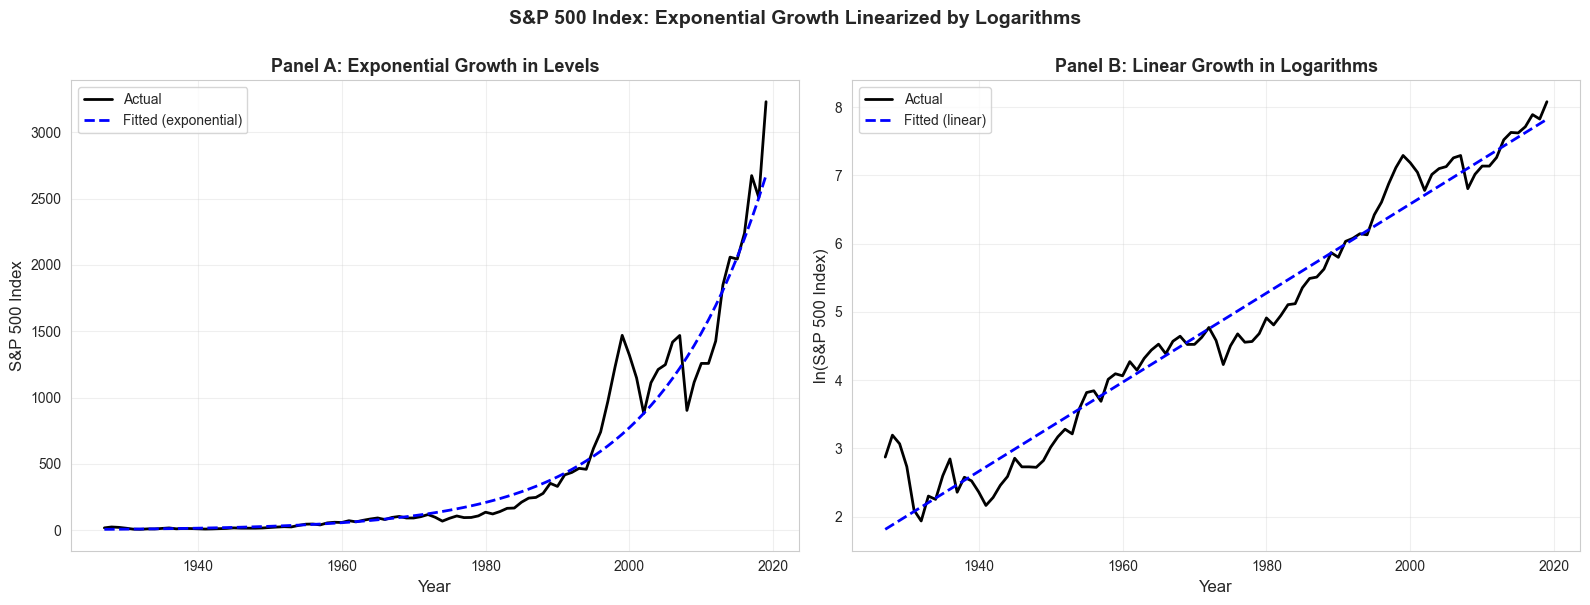


📊 Key Observation:
   - Left panel: Exponential curve in levels (hard to model)
   - Right panel: Straight line in logs (easy to model with OLS!)
   - The slope of the line = average growth rate


In [ ]:
# Create visualization showing exponential vs linear in logs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: Exponential growth in levels
# Apply retransformation bias correction
n = len(data_sp500)
k = 2
MSE = np.sum(model_sp500.resid**2) / (n - k)
psp500 = np.exp(model_sp500.fittedvalues) * np.exp(MSE/2)

axes[0].plot(data_sp500['year'], data_sp500['sp500'], linewidth=2,
             label='Actual', color='black')
axes[0].plot(data_sp500['year'], psp500, linewidth=2, linestyle='--',
             label='Fitted (exponential)', color='blue')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('S&P 500 Index', fontsize=12)
axes[0].set_title('Panel A: Exponential Growth in Levels',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Linear growth in logs
axes[1].plot(data_sp500['year'], data_sp500['lnsp500'], linewidth=2,
             label='Actual', color='black')
axes[1].plot(data_sp500['year'], model_sp500.fittedvalues, linewidth=2,
             linestyle='--', label='Fitted (linear)', color='blue')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('ln(S&P 500 Index)', fontsize=12)
axes[1].set_title('Panel B: Linear Growth in Logarithms',
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('S&P 500 Index: Exponential Growth Linearized by Logarithms',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 Key Observation:")
print("   - Left panel: Exponential curve in levels (hard to model)")
print("   - Right panel: Straight line in logs (easy to model with OLS!)")
print("   - The slope of the line = average growth rate")

## 📚 Chapter Summary

**Key Takeaways:**

1. **Natural logarithms** let us work with **proportionate changes** instead of absolute changes.
   - Key approximation: Δln(x) ≈ Δx/x (proportionate change)
   - 100×Δln(x) ≈ percentage change in x

2. **Four model specifications** give different interpretations:

| Model | Specification | Interpretation of β₁ |
|-------|---------------|---------------------|
| **Linear** | y = β₀ + β₁x | Δy/Δx (absolute change) |
| **Log-linear** | ln(y) = β₀ + β₁x | Semi-elasticity: (Δy/y)/Δx |
| **Log-log** | ln(y) = β₀ + β₁ln(x) | Elasticity: (Δy/y)/(Δx/x) |
| **Linear-log** | y = β₀ + β₁ln(x) | Δy/(Δx/x) |

3. **Earnings-Education Example:**
   - **Linear:** Each year of education → $5,021 more earnings
   - **Log-linear:** Each year of education → 13.1% more earnings ⭐ (best fit)
   - **Log-log:** 1% more education → 1.48% more earnings (elasticity)
   - **Linear-log:** 1% more education → $545 more earnings

4. **Log-linear model** is most common for earnings regressions:
   - Percentage interpretation scales automatically
   - Handles right-skewed dependent variables
   - Better statistical properties (homoskedasticity)

5. **Exponential growth** becomes **linear in logs:**
   - If x grows exponentially: xₜ = x₀(1+r)ᵗ
   - Then ln(x) grows linearly: ln(xₜ) ≈ ln(x₀) + r·t
   - Regression slope directly estimates growth rate
   - S&P 500 grew 6.5% per year (1927-2019)

6. **When to use logs:**
   - ✅ Dependent variable is right-skewed (earnings, prices, firm size)
   - ✅ Economic theory predicts percentage effects (elasticities)
   - ✅ Multiplicative relationships
   - ✅ Exponential growth/decay
   - ❌ Variable can be zero or negative (ln not defined)

**Practical Guidelines:**
- For labor economics (earnings): Use **log-linear**
- For demand analysis (price/quantity): Use **log-log** (elasticity)
- For growth analysis (time series): Use **log-linear**
- Always compare models: R², economic interpretation, theory

**Statistical Methods Covered:**
- Logarithmic transformations
- Semi-elasticities and elasticities
- Model specification and comparison
- Retransformation bias correction
- Exponential growth modeling

**Python Tools Used:**
- `numpy.log()`: Natural logarithm
- `numpy.exp()`: Exponential function
- `statsmodels.ols()`: Regression estimation
- `pandas`: Data manipulation
- `matplotlib`: Visualization

**Next Steps:**
- **Chapter 10**: Multiple regression (adding more explanatory variables)
- **Chapter 11**: Inference for multiple regression
- **Chapter 15**: Transformed variables (polynomials, interactions)

---

**Congratulations!** 🎉 You now understand:
- How to choose between model specifications
- How to interpret coefficients in log models
- When logarithmic transformations are appropriate
- How to estimate elasticities and semi-elasticities

These tools are fundamental to empirical work in labor economics, industrial organization, macroeconomics, and beyond!